In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import datetime
import plotly.graph_objects as go
%matplotlib inline
plt.style.use('ggplot')
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
def surplus(df):
    df_surplus = df.copy()
    df_surplus.fillna(0,inplace=True)
    df_surplus["surplus"] = df_surplus["Gres"] + df_surplus["batCharge"] + df_surplus["evCharge"] + df_surplus["b"]
    df_surplus["load"] =  df_surplus["evCharge"] + df_surplus["b"]
    df_surplus["surplus"][df_surplus["surplus"]<0] = 0
    df_surplus["Gres_sur"] = df_surplus["Gres"] - df_surplus["surplus"]
    return df_surplus

In [3]:
df1 = pd.read_csv(r"C:\Users\Janwe\OneDrive\Desktop\Bachelor_Arbeit\Daten\Szenarien\upperBenchmark\1_upperBenchmark_50b.csv")
df2 = pd.read_csv(r"C:\Users\Janwe\OneDrive\Desktop\Bachelor_Arbeit\Daten\Szenarien\upperBenchmark\2_upperBenchmark_50b.csv")
df3 = pd.read_csv(r"C:\Users\Janwe\OneDrive\Desktop\Bachelor_Arbeit\Daten\Szenarien\upperBenchmark\3_upperBenchmark_50b.csv")
df4 = pd.read_csv(r"C:\Users\Janwe\OneDrive\Desktop\Bachelor_Arbeit\Daten\Szenarien\upperBenchmark\4_upperBenchmark_50b.csv")
frames = [df1,df2,df3,df4]
df_bench = pd.concat(frames)
df_bench.reset_index(drop=True, inplace=True)

In [4]:
df1 = pd.read_csv(r"C:/Users/Janwe/OneDrive/Desktop/Bachelor_Arbeit/Daten/Szenarien/Renewable_Energy_Mix/1_wind_0.csv")
df2 = pd.read_csv(r"C:/Users/Janwe/OneDrive/Desktop/Bachelor_Arbeit/Daten/Szenarien/Renewable_Energy_Mix/2_wind_0.csv")
df3 = pd.read_csv(r"C:/Users/Janwe/OneDrive/Desktop/Bachelor_Arbeit/Daten/Szenarien/Renewable_Energy_Mix/3_wind_0.csv")
df4 = pd.read_csv(r"C:/Users/Janwe/OneDrive/Desktop/Bachelor_Arbeit/Daten/Szenarien/Renewable_Energy_Mix/4_wind_0.csv")
frames = [df1,df2,df3,df4]
df_wind_0 = pd.concat(frames)
df_wind_0.reset_index(drop=True, inplace=True)

In [5]:
df = pd.read_csv(r"C:/Users/Janwe/OneDrive/Desktop/Bachelor_Arbeit/Daten/base_data_2019_65000_50.csv")
df1 = pd.read_csv(r"C:/Users/Janwe/OneDrive/Desktop/Bachelor_Arbeit/Daten/Szenarien/Renewable_Energy_Mix/1_wind_50.csv")
df2 = pd.read_csv(r"C:/Users/Janwe/OneDrive/Desktop/Bachelor_Arbeit/Daten/Szenarien/Renewable_Energy_Mix/2_wind_50.csv")
df3 = pd.read_csv(r"C:/Users/Janwe/OneDrive/Desktop/Bachelor_Arbeit/Daten/Szenarien/Renewable_Energy_Mix/3_wind_50.csv")
df4 = pd.read_csv(r"C:/Users/Janwe/OneDrive/Desktop/Bachelor_Arbeit/Daten/Szenarien/Renewable_Energy_Mix/4_wind_50.csv")
frames = [df1,df2,df3,df4]
df_wind_50 = pd.concat(frames)
df_wind_50.reset_index(drop=True, inplace=True)

In [6]:
df1 = pd.read_csv(r"C:/Users/Janwe/OneDrive/Desktop/Bachelor_Arbeit/Daten/Szenarien/Renewable_Energy_Mix/1_wind_75.csv")
df2 = pd.read_csv(r"C:/Users/Janwe/OneDrive/Desktop/Bachelor_Arbeit/Daten/Szenarien/Renewable_Energy_Mix/2_wind_75.csv")
df3 = pd.read_csv(r"C:/Users/Janwe/OneDrive/Desktop/Bachelor_Arbeit/Daten/Szenarien/Renewable_Energy_Mix/3_wind_75.csv")
df4 = pd.read_csv(r"C:/Users/Janwe/OneDrive/Desktop/Bachelor_Arbeit/Daten/Szenarien/Renewable_Energy_Mix/4_wind_75.csv")
frames = [df1,df2,df3,df4]
df_wind_75 = pd.concat(frames)
df_wind_75.reset_index(drop=True, inplace=True)

In [7]:
df1 = pd.read_csv(r"C:/Users/Janwe/OneDrive/Desktop/Bachelor_Arbeit/Daten/Szenarien/Renewable_Energy_Mix/1_wind_100.csv")
df2 = pd.read_csv(r"C:/Users/Janwe/OneDrive/Desktop/Bachelor_Arbeit/Daten/Szenarien/Renewable_Energy_Mix/2_wind_100.csv")
df3 = pd.read_csv(r"C:/Users/Janwe/OneDrive/Desktop/Bachelor_Arbeit/Daten/Szenarien/Renewable_Energy_Mix/3_wind_100.csv")
df4 = pd.read_csv(r"C:/Users/Janwe/OneDrive/Desktop/Bachelor_Arbeit/Daten/Szenarien/Renewable_Energy_Mix/4_wind_100.csv")
frames = [df1,df2,df3,df4]
df_wind_100 = pd.concat(frames)
df_wind_100.reset_index(drop=True, inplace=True)

In [8]:
#conventional generation in winter

1 - (sum(df_wind_50[:8640]["Gr"]) + sum(df_wind_50[26112:]["Gr"]) ) / (sum(df_bench[:8640]["Gr"]) + sum(df_bench[26112:]["Gr"]))

0.33348939282529044

In [9]:
#SCR

In [10]:
sum(df_wind_75["Gres"])

201200.00000000317

In [11]:
65000*0.5*0.007

227.5

In [12]:
df_Gr = pd.DataFrame(columns=["Gr", "Wind Share"])
df_Gr["Gr"] = [sum(df_wind_0["Gr"]), sum(df_bench["Gr"]), sum(df_wind_50["Gr"]),sum(df_wind_75["Gr"]), sum(df_wind_100["Gr"])]
df_Gr["Wind Share"] = [0,25,50,75,100]

Text(0, 0.5, 'MWh of conventional generation')

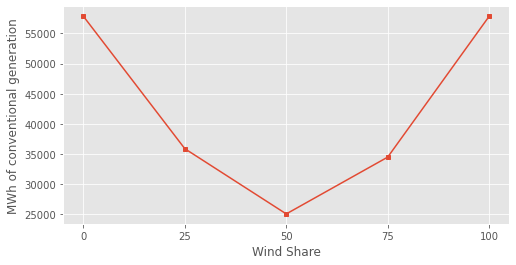

In [13]:
ax = df_Gr.plot(y = "Gr",x = "Wind Share",figsize = (8,4), marker="s", markersize=4, legend=False)
plt.xticks([0,25,50,75,100])
ax.set_ylabel("MWh of conventional generation")

## Comparison between wind and solar

In [14]:
df_base_wind = pd.read_csv(r"C:/Users/Janwe/OneDrive/Desktop/Bachelor_Arbeit/Daten/Szenarien/Renewable_Energy_Mix/RE_base_wind.csv")
df_base_solar = pd.read_csv(r"C:/Users/Janwe/OneDrive/Desktop/Bachelor_Arbeit/Daten/Szenarien/Renewable_Energy_Mix/RE_base_solar.csv")


In [15]:
df_surplus_base_wind = surplus(df_base_wind)
df_surplus_base_solar = surplus(df_base_solar)

C:\Users\Janwe\anaconda3\envs\condaPython3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Janwe\anaconda3\envs\condaPython3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
1 - sum(df_base_wind["Gr"]) / sum(df_base_solar["Gr"])

0.11565240919117048

In [17]:
#SCR wind
(sum(df_surplus_base_wind["Gres"])-sum(df_surplus_base_wind["surplus"]))/sum(df_surplus_base_wind["Gres"])

0.7764696538876503

In [18]:
0.7764696538876503 - 0.6413348565186944

0.13513479736895595

In [19]:
#SCR solar
(sum(df_surplus_base_solar["Gres"])-sum(df_surplus_base_solar["surplus"]))/sum(df_surplus_base_solar["Gres"])

0.6413348565186944

In [20]:
#SSR wind
(sum(df_surplus_base_wind["Gres"]) - sum(df_surplus_base_wind["Gr"])) / abs(sum(df_surplus_base_wind["load"]))

-0.018411847081894903

In [21]:
#SSR wind
(sum(df_surplus_base_solar["Gres"]) - sum(df_surplus_base_solar["Gr"])) / abs(sum(df_surplus_base_solar["load"]))

-0.09308056762777317

In [22]:
#PDR solar
sum(df_surplus_base_solar["Gres"]) / abs(sum(df_surplus_base_solar["load"]))

0.5525499131212264

In [23]:
#PDR solar
sum(df_surplus_base_wind["Gres"]) / abs(sum(df_surplus_base_wind["load"]))

0.5525499131212293

### Comparison between balance and benchmark

In [24]:
df_bench_surplus = surplus(df_bench)
df_balance_surplus = surplus(df_wind_50)

C:\Users\Janwe\anaconda3\envs\condaPython3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Janwe\anaconda3\envs\condaPython3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
#SSR benchmark
(sum(df_bench_surplus["Gres"]) - sum(df_bench_surplus["Gr"])) / abs(sum(df_bench_surplus["load"]))

0.9062069165523383

In [26]:
#SSR balance
(sum(df_balance_surplus["Gres"]) - sum(df_balance_surplus["Gr"])) / abs(sum(df_balance_surplus["load"]))

0.9655355428337562

In [27]:
0.9655355428337562 - 0.8527994639049526

0.11273607892880355

In [28]:
#SCR bench
(sum(df_bench_surplus["Gres"])-sum(df_bench_surplus["surplus"]))/sum(df_bench_surplus["Gres"])

0.7483342140983521

In [29]:
#SCR balance
(sum(df_balance_surplus["Gres"])-sum(df_balance_surplus ["surplus"]))/sum(df_balance_surplus ["Gres"])

0.782258535917465

In [30]:
0.782258535917465 - 0.6945263565724094

0.08773217934505562

In [31]:
sum(df_balance_surplus["surplus"])*1000*6.405/100

2806003.7638266515

In [32]:
sum(df_bench_surplus["surplus"])*1000*6.405/100

3243181.7497045086

In [33]:
winter_balance = pd.concat([df_balance_surplus[:8640],df_balance_surplus[26112:]])
winter_benchmark = pd.concat([df_bench_surplus[:8640],df_bench_surplus[26112:]])

In [34]:
sum(winter_balance["surplus"])

16969.328119295285

In [35]:
sum(winter_benchmark["surplus"])

5713.349256645179

In [36]:
sum(df_bench["Gres"]) / abs(sum(df_bench["b"]))

1.105099826242449